# Sales Forecast Model

## Data preparation and exploration

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [12]:
# Load sales_orders excel
sales_orders_df = pd.read_csv('/Users/diegomarroquin/tobipets_local/data/sales_orders_cleaned.csv')
sales_orders_df

,Unnamed: 0,SKU,order_number,order_date,date_received,provider,brand,product_name,units_ordered,orders_received
0,0,1spFC1796,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
1,1,1spFC3798,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
2,2,1sgFC2792,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Control de Peso - 5.44, kg",2,2
3,3,1sgFC2782,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Indoor Vitality (Pollo) - 5.44, kg",1,1
4,4,1sgFC3790,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Urinario - 1.8, kg",1,1
...,...,...,...,...,...,...,...,...,...,...
6064,6064,-,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adult Small Bites Chicken And Barley - 15, kg",2,0
6065,6065,ScpSD3032,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adulto Chicken And Barley - 15, kg",2,0
6066,6066,Scgsm2138,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"z/d® Feline - 1.81, g",2,2
6067,6067,ScpSD31535,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adult Small Bites Lamb Meal And Brown - 2.04, kg",2,2


In [13]:
# Step 2: Data Exploration
print(sales_orders_df.head())  # Display the first few rows of the data
print(sales_orders_df.describe())  # Calculate summary statistics

   Unnamed: 0        SKU order_number           order_date date_received  \
0           0  1spFC1796       03-031  2022-01-03 00:00:00    2022-01-06   
1           1  1spFC3798       03-031  2022-01-03 00:00:00    2022-01-06   
2           2  1sgFC2792       03-031  2022-01-03 00:00:00    2022-01-06   
3           3  1sgFC2782       03-031  2022-01-03 00:00:00    2022-01-06   
4           4  1sgFC3790       03-031  2022-01-03 00:00:00    2022-01-06   

             provider       brand  \
0  Herrera y Elizondo  1st CHOICE   
1  Herrera y Elizondo  1st CHOICE   
2  Herrera y Elizondo  1st CHOICE   
3  Herrera y Elizondo  1st CHOICE   
4  Herrera y Elizondo  1st CHOICE   

                                        product_name  units_ordered  \
0  Adulto Toda Raza Hipoalergenico (Papa y Pato) ...              5   
1  Adulto Toda Raza Hipoalergenico (Papa y Pato) ...              5   
2                    Gato Control de Peso - 5.44, kg              2   
3            Gato Indoor Vitality (P

In [14]:
# Drop the unnamed column
sales_orders_df = sales_orders_df.copy().drop('Unnamed: 0', axis=1)
sales_orders_df

,SKU,order_number,order_date,date_received,provider,brand,product_name,units_ordered,orders_received
0,1spFC1796,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
1,1spFC3798,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5
2,1sgFC2792,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Control de Peso - 5.44, kg",2,2
3,1sgFC2782,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Indoor Vitality (Pollo) - 5.44, kg",1,1
4,1sgFC3790,03-031,2022-01-03 00:00:00,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Urinario - 1.8, kg",1,1
...,...,...,...,...,...,...,...,...,...
6064,-,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adult Small Bites Chicken And Barley - 15, kg",2,0
6065,ScpSD3032,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adulto Chicken And Barley - 15, kg",2,0
6066,Scgsm2138,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"z/d® Feline - 1.81, g",2,2
6067,ScpSD31535,06-041,2023-05-05 00:00:00,2023-05-08,Vetim,Science Diet,"Adult Small Bites Lamb Meal And Brown - 2.04, kg",2,2


In [15]:
sales_orders_df.describe()

,units_ordered,orders_received
count,6069.000000,6069.000000
mean,3.982699,3.343220
std,7.206750,7.167987
min,-10.000000,0.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,4.000000
max,300.000000,300.000000


In [16]:
sales_orders_df.isna().sum()

SKU                0
order_number       0
order_date         0
date_received      0
provider           0
brand              0
product_name       0
units_ordered      0
orders_received    0
dtype: int64

## Feature Engineering

In [18]:
# Step 3: Feature Engineering
data = sales_orders_df.copy()
data['order_date'] = pd.to_datetime(data['order_date'])  # Convert 'order_date' column to datetime type
data['month'] = data['order_date'].dt.month  # Extract the month from 'order_date'
data.head()

,SKU,order_number,order_date,date_received,provider,brand,product_name,units_ordered,orders_received,month
0,1spFC1796,03-031,2022-01-03,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5,1
1,1spFC3798,03-031,2022-01-03,2022-01-06,Herrera y Elizondo,1st CHOICE,Adulto Toda Raza Hipoalergenico (Papa y Pato) ...,5,5,1
2,1sgFC2792,03-031,2022-01-03,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Control de Peso - 5.44, kg",2,2,1
3,1sgFC2782,03-031,2022-01-03,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Indoor Vitality (Pollo) - 5.44, kg",1,1,1
4,1sgFC3790,03-031,2022-01-03,2022-01-06,Herrera y Elizondo,1st CHOICE,"Gato Urinario - 1.8, kg",1,1,1


## Training

In [19]:
# Step 4: Splitting the Data
train_size = int(len(data) * 0.8)  # Use 80% of the data for training
train_data = data[:train_size]
test_data = data[train_size:]

In [20]:
# Step 5: Model Selection
model = ARIMA(train_data['units_ordered'], order=(1, 0, 0))  # ARIMA(1, 0, 0) model
model_fit = model.fit()

In [21]:
# Step 6: Model Training and Evaluation
predictions = model_fit.predict(start=train_size, end=len(data) - 1)
mse = mean_squared_error(test_data['units_ordered'], predictions)
rmse = mse ** 0.5
print('Root Mean Squared Error (RMSE):', rmse)



Root Mean Squared Error (RMSE): 6.4575056141979825


In [22]:
# Step 7: Model Fine-tuning (optional)

# Step 8: Forecasting
future_dates = pd.date_range(start=data['order_date'].max(), periods=12, freq='M')  # Forecasting for the next 12 months
forecast = model_fit.predict(start=len(data), end=len(data) + 11)

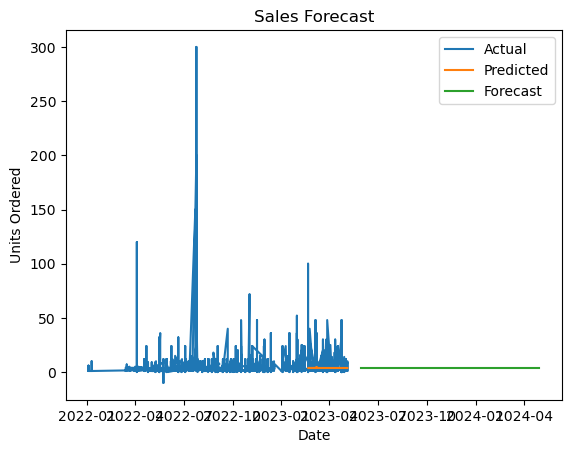

In [23]:
# Step 9: Monitor and Refine

# Visualization
plt.plot(data['order_date'], data['units_ordered'], label='Actual')
plt.plot(test_data['order_date'], predictions, label='Predicted')
plt.plot(future_dates, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Units Ordered')
plt.title('Sales Forecast')
plt.legend()
plt.show()